Merci de **ne pas modifier** le nom de ce notebook (même pour y inclure son nom).

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

----------------------------------------------------------------------------

# DM2 de méthodes numériques

Durée conseillée: 2h environ

**Ne pas modifier le nom de ce fichier, même pour inclure vos noms et prénoms.**
**Si possible ne pas créer de nouvelles cellules dans le notebook pour faciliter la correction.**

Vous utiliserez des noms de variable significatifs (par exemple `t_min` pour une taille minimale, ou `t_moy` pour une taille moyenne...). Vous insérerez autant de commentaires qu'il vous semble nécessaire pour que votre code soit lisible (imaginez que vous deviez transmettre ce code à un autre étudiant de votre groupe pour qu'il puisse continuer ce travail).

## Exercice 1 : Distribution de Maxwell-Boltzmann

On considère un gaz monoatomique, par exemple de l'hélium, à l'équilibre thermique, caractérisé par une température absolue $T$ (en degrés Kelvin K). A cause de l'agitation thermique, il n'est pas possible de prévoir la vitesse (norme et direction) d'un atome particulier du gaz au cours du temps. En revanche il est possible de décrire les vitesses des atomes à l'aide d'une loi de distribution statistique. La probabilité que la norme du vecteur vitesse d'un atome du gaz soit comprise entre les valeurs $v$ et $v+dv$ est donnée par $P(v)dv$ où $P(v)$ est la fonction suivante: 

$$ P(v)= \left(\frac{m}{2\pi k T}\right)^{3/2} e^{-\frac{m v^2}{2 k T}}4\pi v^2$$

Dans cette formule $T$ est la temperature absolue, $m=A \times 1.66 \times 10^{-27} Kg$ la masse d'un atome du gaz (pour de l'Hélium, A=4), et $k=1.38 \times 10^{-23} J.K^{-1}$ la constante de Boltzmann. 

1. Ecrire une fonction ```Boltzmann(v,A,T)``` qui calcule la valeur de $P(v)$.

In [36]:
import numpy as np      #On importe la bibliothèque numpy car nous aurons besoin de l'exponentielle et de pi

A = 4                   #On fixe la constante A
m = A*1.66*10**(-27)    #On calcul la masse d'un atome d'Hélium
k = 1.38*10**(-23)      #On fixe la constante de Boltzmann

def Boltzmann(v,A,T):
    """
    Fonction qui va calculer la probabilité P(v) de v 
    """
    P = (m/(2*np.pi*k*T))**(3/2)*np.exp(-((m*(v**2))/(2*k*T)))*4*np.pi*(v)**2
    return P

2. Représenter graphiquement la fonction $P(v)$ pour différentes températures (T=273 K, 373 K et 473 K), et pour une norme du vecteur vitesse $v$ prise entre 0 et cinq fois la vitesse caractéristique $v_s=\sqrt{kT/m}$.

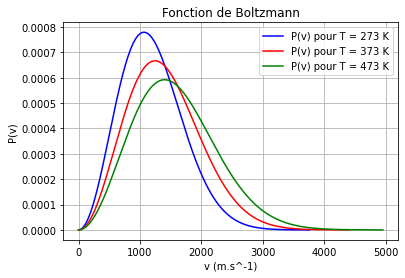

In [37]:
import matplotlib.pyplot as plt  #On importe la bibliothèque matplotlib pour tracer notre graphique

T1 = 273                 #On fixe une valeur de T = 273 K
vs1 = np.sqrt((k*T1)/m)  #On calcule la vitesse caractéristique en fonction de cette température

T2 = 373                 #On fixe une valeur de T = 373 K
vs2 = np.sqrt((k*T2)/m)  #On calcule la vitesse caractéristique en fonction de cette température

T3 = 473                 #On fixe une valeur de T = 473 K
vs3 = np.sqrt((k*T3)/m)  #On calcule la vitesse caractéristique en fonction de cette température

#On norme la vitesse v entre 0 et 5 fois la valeur de la vitesse caractéristique

v1 = np.arange(0, 5*vs1)  #Ici pour T = 273 K
v2 = np.arange(0, 5*vs2)  #Ici pour T = 373 K
v3 = np.arange(0, 5*vs3)  #Ici pour T = 473 K

#On trace le graphique de P(v) en fonction de la vitesse v
fig = plt.figure()
plt.plot( v1,Boltzmann(v1,A,T1),color = 'b', label = 'P(v) pour T = 273 K') #Ici on trace P(v1) en fonction de v1
plt.plot( v2,Boltzmann(v2,A,T2),color = 'r', label = 'P(v) pour T = 373 K') #Ici on trace P(v2) en fonction de v2
plt.plot( v3,Boltzmann(v3,A,T3),color = 'g', label = 'P(v) pour T = 473 K') #Ici on trace P(v3) en fonction de v3
plt.title('Fonction de Boltzmann')
plt.xlabel('v (m.s^-1)')
plt.ylabel('P(v)')
plt.grid( True )
plt.legend()
plt.show()

3.a. Ecrire un programme permettant de déterminer la vitesse $v_{max}$ pour laquelle la fonction $P(v)$ est maximum. Que vaut $\frac {v_{max}}{v_s}$ pour T=273 K, 373 K et 473 K ?

In [38]:
for i in v1:
    """
    On créer une fonction qui va parcourir toutes les valeurs de P(v1) et qui quand elle atteindra son maximum resortira la
    valeur de v1 associée
    """
    if Boltzmann(i,A,T1) == np.amax(Boltzmann(v1,A,T1)):
        v1_max = i
        
for i in v2:
    """
    On créer une fonction qui va parcourir toutes les valeurs de P(v2) et qui quand elle atteindra son maximum resortira la
    valeur de v2 associée
    """
    if Boltzmann(i,A,T2) == np.amax(Boltzmann(v2,A,T2)):
        v2_max = i
        
for i in v3:
    """
    On créer une fonction qui va parcourir toutes les valeurs de P(v3) et qui quand elle atteindra son maximum resortira la
    valeur de v3 associée
    """
    if Boltzmann(i,A,T3) == np.amax(Boltzmann(v3,A,T3)):
        v3_max = i

print('valeur de vmax_1 =',v1_max) #On affiche la valeurs de v1 pour la quelle P(v1) atteint son maximum
print('valeur de vmax_2 =',v2_max) #On affiche la valeurs de v2 pour la quelle P(v2) atteint son maximum
print('valeur de vmax_3 =',v3_max) #On affiche la valeurs de v3 pour la quelle P(v3) atteint son maximum

#On calcul le rapport de la vitesse max sur la vitesse caractéristique

print('valeur de vmax_1/vs_1 =',round(v1_max/vs1,2))
print('valeur de vmax_1/vs_1 =',round(v2_max/vs2,2))    
print('valeur de vmax_1/vs_1 =',round(v3_max/vs3,2))    

valeur de vmax_1 = 1065.0
valeur de vmax_2 = 1245.0
valeur de vmax_3 = 1402.0
valeur de vmax_1/vs_1 = 1.41
valeur de vmax_1/vs_1 = 1.41
valeur de vmax_1/vs_1 = 1.41


3.b Comment évolue $v_{max}$ avec la température ?

Réponce : On voit que vmax augmentes quand la température augmentes

L'intégrale $P_{cum}(v)=\int _0^{v} P(v)dv$ représente la probabilité que la vitesse de l'atome soit comprise entre $0$ et $v$.

4. Verifier numériquement que l'intégrale $\int _0^{\infty} P(v)dv$ vaut 1.

In [39]:
from scipy.integrate import trapz   #On import depuis la bibliothèque scipy le module trapèze pour calculer nos intégrales

def intergral_Pv(v,T):
    """
    Cette fonction retourne, par la méthode des trapèses, l'intégrale de 0 à l'inf de P(v)
    """
    return trapz(Boltzmann(v,A,T))

Pv_1 = intergral_Pv(v1,T1)     #On calcule l'intégrale de P(v1)
Pv_2 = intergral_Pv(v2,T2)     #On calcule l'intégrale de P(v2)
Pv_3 = intergral_Pv(v3,T3)     #On calcule l'intégrale de P(v3)

print('intégrale de P(v1) =',round(Pv_1))        #On affiche un arrondi de la valeur de l'intégrale de P(v1) 
print('intégrale de P(v2) =',round(Pv_2))        #On affiche un arrondi de la valeur de l'intégrale de P(v2) 
print('intégrale de P(v3) =',round(Pv_3))        #On affiche un arrondi de la valeur de l'intégrale de P(v3) 

intégrale de P(v1) = 1
intégrale de P(v2) = 1
intégrale de P(v3) = 1


5. Représenter graphiquement la fonction $P_{cum}(v)$ pour différentes températures (T=273 K, 373 K et 473 K), 
et pour une norme du vecteur vitesse $v$ prise entre 0 et cinq fois la vitesse caractéristique $v_s=\sqrt{kT/m}$. *On pourra utiliser la fonction [cumtrapz](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.cumtrapz.html) du module integrate de scipy.*

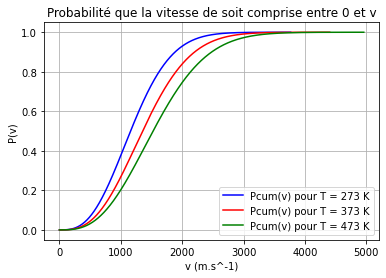

In [40]:
from scipy.integrate import cumtrapz   #On import depuis la bibliothèque scipy le module cumtrapz pour calculer Pcum
 

def Pcum_v(v,T):
    """
    Cette fonction va calculer la probabilité que la vitesse de l'atome soit comprise entre 0 et v
    """
    return cumtrapz(Boltzmann(v,A,T),initial=0)

P1 = Pcum_v(v1,T1)    #On calcule Pcum de v1
P2 = Pcum_v(v2,T2)    #On calcule Pcum de v2
P3 = Pcum_v(v3,T3)    #On calcule Pcum de v3

fig = plt.figure()
plt.plot( v1,P1,color = 'b', label = 'Pcum(v) pour T = 273 K')          #On trace Pcum en fonction de v1
plt.plot( v2,P2,color = 'r', label = 'Pcum(v) pour T = 373 K')          #On trace Pcum en fonction de v2
plt.plot( v3,P3,color = 'g', label = 'Pcum(v) pour T = 473 K')          #On trace Pcum en fonction de v3
plt.title('Probabilité que la vitesse de soit comprise entre 0 et v')
plt.xlabel('v (m.s^-1)')
plt.ylabel('P(v)')
plt.legend()
plt.grid( True )
plt.show()

6.a. Pour chacune des températures ci-dessus, écrire un code permettant de déterminer 
la vitesse médiane $v_{1/2}$ correspondant à une valeur de $P_{cum}=0.5$. Représenter ces points sur le graphe précédent (de la question 5). *On pourra utiliser [axvline](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.axvline.html).*

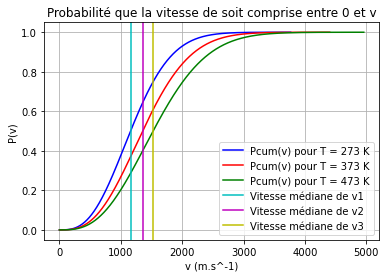

In [41]:
def v12(P,v):
    """
    Cette fonction va parcourir les valeurs de Pcum et va retourner la valeur de la vitesse pour laquelle Pcum = 0.5
    """
    v12 = 0   
    for (index,p) in enumerate (P):   
        if round(p,3) == 0.5:
            v12 = v[index]
    return v12

fig = plt.figure()
plt.plot( v1,P1,color = 'b', label = 'Pcum(v) pour T = 273 K')          #On trace Pcum en fonction de v1
plt.plot( v2,P2,color = 'r', label = 'Pcum(v) pour T = 373 K')          #On trace Pcum en fonction de v2
plt.plot( v3,P3,color = 'g', label = 'Pcum(v) pour T = 473 K')          #On trace Pcum en fonction de v3
plt.axvline( v12(P1,v1),color = 'c',label = 'Vitesse médiane de v1')    #On trace avec axvline la valeur de la vitesse médiane pour v1
plt.axvline( v12(P2,v2),color = 'm',label = 'Vitesse médiane de v2')    #On trace avec axvline la valeur de la vitesse médiane pour v2
plt.axvline( v12(P3,v3),color = 'y',label = 'Vitesse médiane de v3')    #On trace avec axvline la valeur de la vitesse médiane pour v3
plt.title('Probabilité que la vitesse de soit comprise entre 0 et v')
plt.xlabel('v (m.s^-1)')
plt.ylabel('P(v)')
plt.legend()
plt.grid( True )
plt.show()

6.b. Comment évoluent les vitesses médianes avec la température ?

REPONSE : On voit que la vitesse médiane augmente avec la température

7. Calculer la vitesse quadratique moyenne $v_{q}$ définie par l'intégrale suivante: $v_q^2=\int _0^{\infty} v^2 P(v)dv$. Comparer l'énergie cinétique moyenne $\frac{1}{2}m v_q^2$ à la grandeur $k T$. NB pour un gaz parfait monoatomique à l'équilibre thermodynamique, l'énergie cinétique moyenne est égale à $\frac{3kT}{2}$

In [42]:
def v_quad(v,P):
    """
    Cette fonction va calculer la vitesse quadratique moyenne 
    """
    return trapz((v**2)*P,v)  

def ec_moyenne(v_q):
    """
    Cette fonction va calculer l'énergie cinétique moyenne 
    """
    return (1/2)*m*v_q

def equilibre_T(T,k):
    """
    Cette fonction va calculer la grandeur kT
    """
    return k*T

v_q1 = v_quad(v1,P1)   #On calcule la vitesse quadratique moyenne de v1
v_q2 = v_quad(v2,P2)   #On calcule la vitesse quadratique moyenne de v2
v_q3 = v_quad(v3,P3)   #On calcule la vitesse quadratique moyenne de v3

ec_1 = ec_moyenne(v_q1)   #On calcule l'énergie cinétique moyenne de v1
ec_2 = ec_moyenne(v_q2)   #On calcule l'énergie cinétique moyenne de v2
ec_3 = ec_moyenne(v_q3)   #On calcule l'énergie cinétique moyenne de v3

eq_T1 = equilibre_T(k,T1)  #On calcule k*T1
eq_T2 = equilibre_T(k,T2)  #On calcule k*T2
eq_T3 = equilibre_T(k,T3)  #On calcule k*T3

print('Valeur de ec =',ec_1,'\tValeur de kt =',eq_T1)   #On compare l'énergie cinétique moyenne de v1 à la grandeur kT1
print('Valeur de ec =',ec_2,'\tValeur de kt =',eq_T2)   #On compare l'énergie cinétique moyenne de v2 à la grandeur kT2
print('Valeur de ec =',ec_3,'\tValeur de kt =',eq_T3)   #On compare l'énergie cinétique moyenne de v3 à la grandeur kT3

Valeur de ec = 5.609072631098004e-17 	Valeur de kt = 3.767399999999999e-21
Valeur de ec = 8.957765402279298e-17 	Valeur de kt = 5.147399999999999e-21
Valeur de ec = 1.27910191931637e-16 	Valeur de kt = 6.5273999999999986e-21


## Exercice 2 : équation de Hill

Un muscle convertit de l'énergie chimique (provenant des nutriments) en énergie mécanique "utile" (travail) et en chaleur. Expérimentalement, on étudie ses performances en mesurant sa vitesse de contraction $V$ en fonction de la force appliquée $F$. Dans ce contexte, la vitesse a pour unité des cm/s tandis que,  par abus de langage, la force est exprimée en grammes ($g$).

Archibald Hill (Prix Nobel de médecine) fut le premier à proposer une loi empirique reliant la vitesse de contraction à la force appliquée. L'équation de Hill est de la forme: 
- $V=\frac{b(F_0-F)}{F+a}$ où $F_0$, $a$ et $b$ sont des constantes.

1. Ecrire une fonction `equation_hill(F,a,b,F0)` qui calcule puis retourne la vitesse $V$ en fonction de la force $F$, et des cosntantes, $F_0$, $a$ et $b$.

In [43]:
def equation_hill(F,F0,a,b):
    """
    Cette fonction est la retranscription de l'équation de Hill
    """
    V = (b*(F0-F))/(F+a)
    return V

2. Tester cette fonction en déterminant la valeur de $V$ pour $F=20g$ et $F_0=50g$, $a=20 g$ et $b=1 cm/s$.

La cellule suivante teste que vous avez bien répondu à la question en utilisant la variable V_resultat. Pour s'en assurer exécutez la cellule, aucun message d'erreur ne doit apparaître.

In [44]:
v_resultat=equation_hill(20,50,20,1)
print('v_resultat:', v_resultat)
assert 'equation_hill' in globals()

v_resultat: 0.75


3. En utilisant cette fonction, tracer sur un même graphe $V$ en fonction de $F$, pour $F$ compris entre 0 et $F_0=50g$ et pour $a=20g$ , $a=30g$ et $a=40g$. Ne pas oublier de faire une légende, et de nommer les axes.

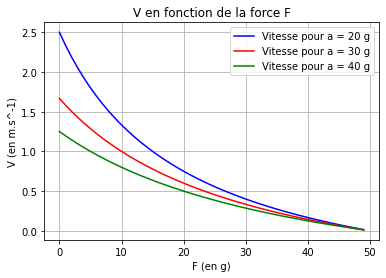

In [45]:
import numpy as np               #On importe la bibliothèque numpy car nous aurons besoin de l'exponentielle et de pi
import matplotlib.pyplot as plt  #On importe la bibliothèque matplotlib pour tracer notre graphique

b = 1                 #On fixe la constante b = 1 cm/s
F0 = 50               #On fixe la force F0 = 50 g
F = np.arange(0,F0)   #On dit que la force F prend ses valeurs entre 0 et F0

fig = plt.figure()
plt.plot( F,equation_hill(F,F0,20,b),color = 'b',label = 'Vitesse pour a = 20 g') #On trace la Vitesse de cotraction en fonction de F pour a = 20 g
plt.plot( F,equation_hill(F,F0,30,b),color = 'r',label = 'Vitesse pour a = 30 g') #On trace la Vitesse de cotraction en fonction de F pour a = 30 g
plt.plot( F,equation_hill(F,F0,40,b),color = 'g',label = 'Vitesse pour a = 40 g') #On trace la Vitesse de cotraction en fonction de F pour a = 40 g
plt.title('V en fonction de la force F')
plt.xlabel('F (en g)')
plt.ylabel('V (en m.s^-1)')
plt.grid( True )
plt.legend()
plt.show()

4. Que vaut la force $F$ lorsque la vitesse s'annule ? Que vaut la vitesse $V$ lorsque la force est nulle ?

REPONSE : On peut voir par le calcule que : Lorsque la force s'annule V vaut : 50 g |
                                            Lorsque la vitesse s'annule F vaut : 2.50 pour a = 20 m/s,
                                                                                 1.66 pour a = 30 m/s,
                                                                                 1.25 pour a = 40 m/s

Expérimentalement, A. Hill a mesuré les valeurs suivantes pour un muscle de grenouille.

| $F$ (g) | 0.0 | 5.0 | 9.0 | 17 | 25 | 40 | 52  
|---|---|---|---|---|---|---|---
| $V$ (cm/s) | 5.0 | 4.1 | 3.0 | 1.9 | 1.1 | 0.7 | 0.3  
| $\Delta V$ (cm/s) | 0.1 | 0.1 | 0.1 | 0.1 | 0.2 | 0.2 | 0.2

Dans ce tableau, $\Delta V$ est l'incertitude sur la vitesse de contraction $V$.

5. En ajustant l'équation de Hill aux données expérimentales, déterminer $a$,$b$ et $F_0$, ainsi que l'incertitude sur ces grandeurs. En déduire $v_{max}=bF_0/a$, la vitesse maximale de contraction. Représenter graphiquement les données et l'ajustement expérimental.

F0 = 56.6 g +/- 12.0 g
a = 22.4 g +/- 6.0 g
b = 2.0 g +/- 0.9 g
vmax = 5.1 g


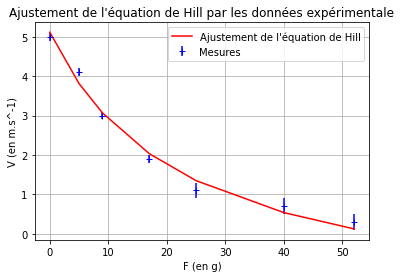

In [46]:
from scipy.optimize import curve_fit  #On importe depuis la bibliothèque scipy le module curve_fit pour faire un ajustement de l'équation de Hill

F=np.array([0.0,5.0, 9.0, 17, 25, 40, 52])
V=np.array([5.0,4.1, 3.0, 1.9, 1.1, 0.7, 0.3])
sigma_V=np.array([0.1,0.1, 0.1, 0.1, 0.2, 0.2, 0.2])

#initialisation de la regression
p0= np.array([1,1,1]) # [F0,a,b]

params,cov = curve_fit(equation_hill, F, V, p0, sigma_V)
[F0,a,b] = params

print('F0 =',round(params[0],1),'g','+/-',round(np.sqrt(cov[0,0]),1),'g')  #On affiche la valeur de F0 avec les insertitudes
print('a =',round(params[1],1),'g','+/-',round(np.sqrt(cov[1,1]),1),'g')  #On affiche la valeur de a avec les insertitudes
print('b =',round(params[2],1),'g','+/-',round(np.sqrt(cov[2,2]),1),'g')  #On affiche la valeur de b avec les insertitudes
print('vmax =',round((b*F0)/a,1),'g')   #On affiche la valeur de vmax 

plt.figure()
plt.errorbar(F ,V, yerr=sigma_V, marker='+', color='b', linestyle='None',label ='Mesures')  #On place nos mesures expériementales 
plt.plot( F,equation_hill(F,F0,a,b),color = 'r',label = 'Ajustement de l\'équation de Hill') #On tracve notre ajustement de l'équation de Hill
plt.title('Ajustement de l\'équation de Hill par les données expérimentale')
plt.xlabel('F (en g)')
plt.ylabel('V (en m.s^-1)')
plt.grid( True )
plt.legend()
plt.show()

Dans la suite de son travail A. Hill s'est également intéressé à la puissance fournie par le muscle. 

- La puissance mécanique utile $P$ est estimée en multipliant la force $F$ par la vitesse $V$: $P=FV$.
- La puissance thermique est données par $P_{th}=aV$ (c'est un autre résultat important démontré expérimentalement par Hill).
- La puissance totale est alors $P_{tot}=P+P_{th}$.

6. Définir les fonctions `puissance(F,F0,a,b)` et `puissance_thermique(F,F0,a,b)` qui calculent les puissances utiles et thermiques en fonction de $F$, $F_0$, $a$ et $b$.

In [47]:
def puissace(F,F0,a,b):
    """
    Cette fonction calcule la puissance utile
    """
    P = ((b*(F0-F))/(F+a)) * F
    return P

def puissance_thermique(F,F0,a,b):
    """
    Cette fonction calcule la puissance thermique
    """
    Pth = a * ((b*(F0-F))/(F+a))
    return Pth

def puissance_totale(F,F0,a,b):
    """
    Cette fonction calcule la puissance totale
    """
    Ptot = ( ((b*(F0-F))/(F+a)) * F) + (a * ((b*(F0-F))/(F+a)))
    return Ptot

7. Tracer sur un même graphe, les puissances utile, thermique et totale en fonction des valeurs de $F$ expérimentales et en utilisant les valeurs de $F_0$, $a$ et $b$ trouvées à la question 5.

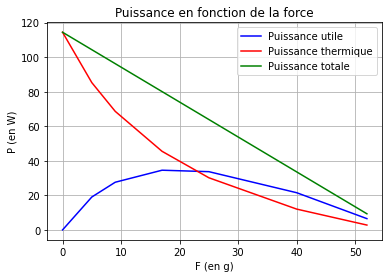

In [48]:
#Nous utiliserons les constantes F0,a,b trouvées à la question 5

fig = plt.figure()
plt.plot( F,puissace(F,F0,a,b),color = 'b',label = 'Puissance utile')    #On tarce la puissance utile en fonction de la force F 
plt.plot( F,puissance_thermique(F,F0,a,b),color = 'r',label = 'Puissance thermique')  #On trace la puissance thermique en fonction de la force F
plt.plot( F,puissance_totale(F,F0,a,b),color = 'g', label = 'Puissance totale')   # #On tarce la puissance totale en fonction de la force F 
plt.title('Puissance en fonction de la force')
plt.xlabel('F (en g)')
plt.ylabel('P (en W)')
plt.grid( True )
plt.legend()
plt.show()

## Qualité du code (2 points)

- Le code est-il bien commenté ?
- Les variables ont des noms explicites et clairs ?